In [32]:
import acoular
ts = acoular.TimeSamples( name="44.h5" )
ts

In [33]:
print( ts.numchannels, ts.numsamples, ts.sample_freq )

10 3073027 51200.0


In [34]:
ps = acoular.PowerSpectra( time_data=ts, block_size=1024)

In [35]:
ps.csm.shape

[('45_cache.h5', 2), ('46_cache.h5', 1)]


(513, 10, 10)

In [36]:
from os import path
#micgeofile = path.join(path.split(acoular.__file__)[0],'xml','array_64.xml')
micgeofile = 'array_10.xml'
mg = acoular.MicGeom( from_file=micgeofile )
mg.mpos

array([[3.76  , 3.76  , 3.76  , 1.88  , 1.88  , 1.88  , 0.    , 0.    ,
        0.    , 0.38  ],
       [3.735 , 1.8675, 0.    , 3.735 , 1.8675, 0.    , 3.735 , 1.8675,
        0.    , 1.9175],
       [1.675 , 0.5875, 1.675 , 1.675 , 1.675 , 1.675 , 1.675 , 0.5875,
        1.675 , 1.    ]])

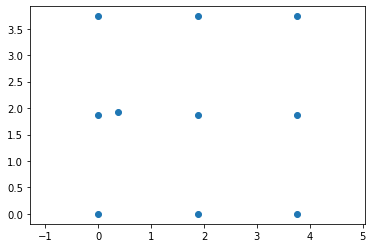

In [37]:
%matplotlib inline
import matplotlib.pylab as plt

plt.plot( mg.mpos[0], mg.mpos[1], 'o' )
plt.axis( 'equal' );

In [38]:
rg = acoular.RectGrid( x_min=-0.2, x_max=4,
                       y_min=-0.2, y_max=4,
                       z=1, increment=0.01 )
rg.pos()

array([[-0.2 , -0.2 , -0.2 , ...,  4.  ,  4.  ,  4.  ],
       [-0.2 , -0.19, -0.18, ...,  3.98,  3.99,  4.  ],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]])

In [39]:
st = acoular.SteeringVector( grid=rg, mics=mg )
st.env.c

343.0

In [40]:
bb = acoular.BeamformerBase( freq_data=ps, steer=st )

In [41]:
pm = bb.synthetic( 10000, 3 )
Lm = acoular.L_p( pm )

[('46_cache.h5', 2)]


In [42]:
print(Lm.shape)
print(Lm)

(421, 421)
[[43.42753055 43.85089179 44.88169543 ... 32.75449837 32.2687045
  31.50279478]
 [43.42493992 43.08911987 43.88132792 ... 31.82535187 30.56583577
  31.10629877]
 [44.5803652  43.3976575  43.18172802 ... 31.3009489  31.19756437
  32.32911955]
 ...
 [34.4592115  34.76143634 33.97318221 ... 34.79217912 33.96304648
  32.85708731]
 [34.90503718 34.64517131 34.85925102 ... 35.07544551 34.59223519
  32.81304496]
 [34.66563522 34.85437929 34.91291068 ... 34.56673391 34.5014709
  32.70981864]]


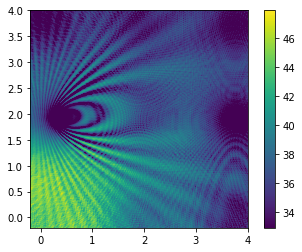

In [43]:
plt.figure()
plt.imshow( Lm.T, origin="lower", vmin=Lm.max()-15, extent=rg.extend() )
plt.colorbar();